In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
# imdb의 데이터를 불러와 훈련에 사용할 train과 훈련 후 모델 검증에 사용할 train으로 나누어 저장한다
# 가장 많이 사용하는 단어 10000개만 사용

In [3]:
def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension)) # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬 생성
    for i, sequence in enumerate(sequences) :
        for j in sequence:
            results[i, j] = 1. # i리뷰에 존재하는 단어의 index j의 값을 1로 변경한다
    return results

In [4]:
x_train = vectorize_sequences(train_data) 
# 훈련 데이터를 각각의 리뷰마다 같은 크기를 가지는 벡터로 변경한다

In [5]:
y_train = np.asarray(train_labels).astype("float32")

In [6]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# 16개의 유닛을 가진 2개의 중간층
# 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세 번째 층
# 마지막 층은 이진 분류 문제의 확률을 출력하기 위해 sigmoid를 사용

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# 이진 분류 문제에서 확률을 출력할 때는 binary_crossentropy가 최선의 선택
# 옵티마이저는 rmsprop을 사용, 대부분의 문제에서 기본으로 사용
# 모니터링 지표로는 정확도를 사용 

history_original = model.fit(x_train, y_train,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5110 - accuracy: 0.7914 - val_loss: 0.3930 - val_accuracy: 0.8557
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3081 - accuracy: 0.9013 - val_loss: 0.3122 - val_accuracy: 0.8843
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2261 - accuracy: 0.9281 - val_loss: 0.2770 - val_accuracy: 0.8933
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1772 - accuracy: 0.9411 - val_loss: 0.2727 - val_accuracy: 0.8937
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1438 - accuracy: 0.9537 - val_loss: 0.2889 - val_accuracy: 0.8860
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1186 - accuracy: 0.9634 - val_loss: 0.2954 - val_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1002 - accuracy: 0.9689 - val_loss: 0.3279 - val_accuracy: 0.8799
Epoch 8/20
30

In [7]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# 16개의 유닛을 가진 2개의 중간층
# 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세 번째 층
# 마지막 층은 이진 분류 문제의 확률을 출력하기 위해 sigmoid를 사용

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# 이진 분류 문제에서 확률을 출력할 때는 binary_crossentropy가 최선의 선택
# 옵티마이저는 rmsprop을 사용, 대부분의 문제에서 기본으로 사용
# 모니터링 지표로는 정확도를 사용 

history_smaller_model = model.fit(x_train, y_train,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6452 - accuracy: 0.7236 - val_loss: 0.5956 - val_accuracy: 0.8316
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.5522 - accuracy: 0.8579 - val_loss: 0.5163 - val_accuracy: 0.8561
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4663 - accuracy: 0.8835 - val_loss: 0.4448 - val_accuracy: 0.8666
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3868 - accuracy: 0.9001 - val_loss: 0.3820 - val_accuracy: 0.8763
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3173 - accuracy: 0.9171 - val_loss: 0.3339 - val_accuracy: 0.8853
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2654 - accuracy: 0.9282 - val_loss: 0.3059 - val_accuracy: 0.8898
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2299 - accuracy: 0.9353 - val_loss: 0.2896 - val_accuracy: 0.8919
Epoch 8/20
30

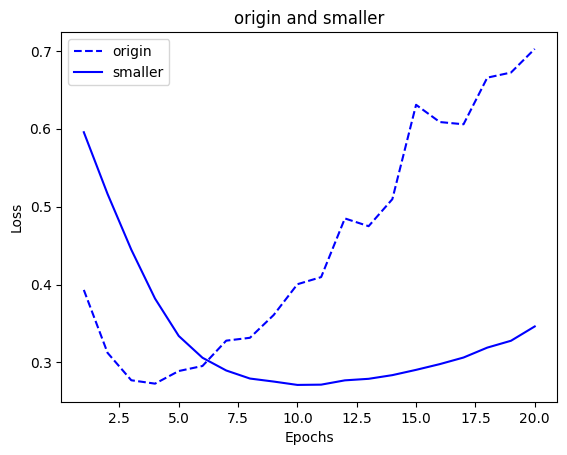

In [8]:
history_origin = history_original.history
origin_val_loss = history_origin["val_loss"]
history_smaller = history_smaller_model.history
smaller_val_loss = history_smaller['val_loss']
epochs = range(1, len(origin_val_loss) + 1)
plt.plot(epochs, origin_val_loss, "b--", label="origin")
plt.plot(epochs, smaller_val_loss, "b-", label="smaller")
plt.title("origin and smaller")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# history에 저장된 데이터를 matplotlib을 이용하여 시각화한다.
# 그래프의 y축은 loss

In [9]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# 16개의 유닛을 가진 2개의 중간층
# 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세 번째 층
# 마지막 층은 이진 분류 문제의 확률을 출력하기 위해 sigmoid를 사용

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# 이진 분류 문제에서 확률을 출력할 때는 binary_crossentropy가 최선의 선택
# 옵티마이저는 rmsprop을 사용, 대부분의 문제에서 기본으로 사용
# 모니터링 지표로는 정확도를 사용 

history_larger_model = model.fit(x_train, y_train,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 36ms/step - loss: 0.5368 - accuracy: 0.7541 - val_loss: 0.3348 - val_accuracy: 0.8565
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2505 - accuracy: 0.9002 - val_loss: 0.2693 - val_accuracy: 0.8918
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1415 - accuracy: 0.9479 - val_loss: 0.2915 - val_accuracy: 0.8934
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0870 - accuracy: 0.9715 - val_loss: 0.4094 - val_accuracy: 0.8825
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1113 - accuracy: 0.9776 - val_loss: 0.3361 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0056 - accuracy: 0.9996 - val_loss: 0.5145 - val_accuracy: 0.8890
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.6178 - val_accuracy: 0.8883
Epoch 8/20
30

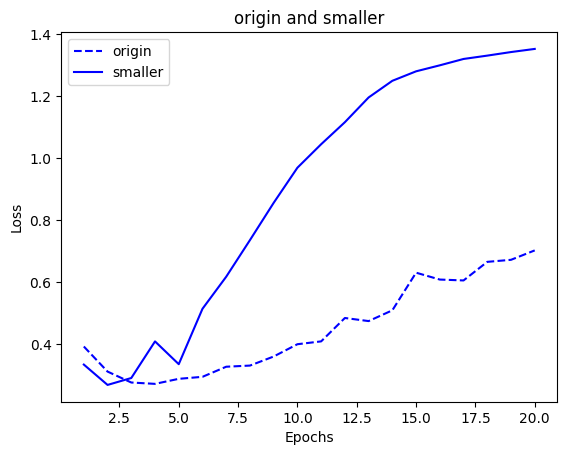

In [10]:
history_origin = history_original.history
origin_val_loss = history_origin["val_loss"]
history_larger = history_larger_model.history
larger_val_loss = history_larger['val_loss']
epochs = range(1, len(origin_val_loss) + 1)
plt.plot(epochs, origin_val_loss, "b--", label="origin")
plt.plot(epochs, larger_val_loss, "b-", label="smaller")
plt.title("origin and smaller")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# history에 저장된 데이터를 matplotlib을 이용하여 시각화한다.
# 그래프의 y축은 loss

In [13]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation='relu'),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l2_reg = model.fit(x_train, y_train,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6092 - accuracy: 0.7659 - val_loss: 0.4677 - val_accuracy: 0.8694
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.4034 - accuracy: 0.8952 - val_loss: 0.3951 - val_accuracy: 0.8821
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3324 - accuracy: 0.9155 - val_loss: 0.3733 - val_accuracy: 0.8837
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2996 - accuracy: 0.9264 - val_loss: 0.3622 - val_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2741 - accuracy: 0.9379 - val_loss: 0.3765 - val_accuracy: 0.8787
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2635 - accuracy: 0.9381 - val_loss: 0.3631 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2522 - accuracy: 0.9416 - val_loss: 0.4013 - val_accuracy: 0.8688
Epoch 8/20
30

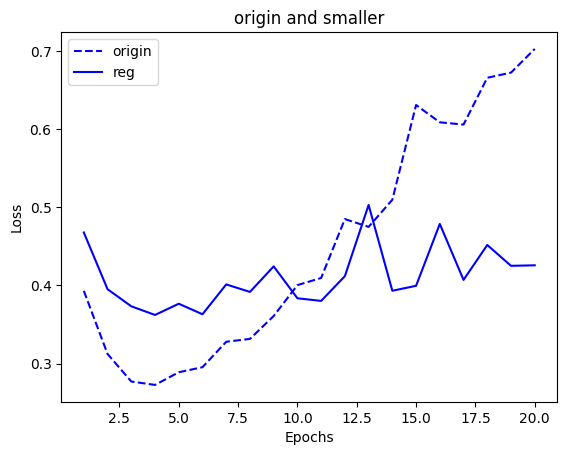

In [15]:
history_origin = history_original.history
origin_val_loss = history_origin["val_loss"]
history_reg = history_l2_reg.history
reg_val_loss = history_reg['val_loss']
epochs = range(1, len(origin_val_loss) + 1)
plt.plot(epochs, origin_val_loss, "b--", label="origin")
plt.plot(epochs, reg_val_loss, "b-", label="reg")
plt.title("origin and smaller")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# history에 저장된 데이터를 matplotlib을 이용하여 시각화한다.
# 그래프의 y축은 loss